In [11]:
%%time
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
from dataclasses import dataclass
from pathlib import Path

import pandas as pd
from dotenv import load_dotenv


@dataclass
class Config:
    project_dir: Path = Path("../../")
    model_dir: Path = project_dir / "models"
    outputs_dir: Path = project_dir / "outputs"
    results_dir: Path = project_dir / "results"
    results_agg_dir: Path = results_dir / "agg"
    results_figs_dir: Path = results_dir / "figs"
    data_dir: Path = project_dir / "data"
    raw_dir: Path = data_dir / "raw"
    interim_dir: Path = data_dir / "interim"
    processed_dir: Path = data_dir / "processed"


config = Config()
sys.path.append(str(config.project_dir.resolve()))
load_dotenv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 2.12 ms, sys: 2.62 ms, total: 4.73 ms
Wall time: 5.43 ms


True

In [3]:
df_reviews = pd.read_csv(
    config.interim_dir
    / "olist_order_reviews_translated_label_review_categories_merged.csv",
)

df_orders = pd.read_csv(config.interim_dir / "olist_orders_customer_merged.csv")
df_item_products = pd.read_csv(
    config.interim_dir / "olist_item_product_seller_merged.csv"
)
df_orders_item_products_merged = pd.merge(
    df_orders, df_item_products, on="order_id", how="left"
)
assert (
    df_orders_item_products_merged["order_id"].nunique()
    == df_orders["order_id"].nunique()
)
df_orders_item_products_review_merged = pd.merge(
    df_orders_item_products_merged,
    df_reviews,
    on="order_id",
    how="left",
)
assert (
    df_orders_item_products_review_merged["order_id"].nunique()
    == df_orders_item_products_merged["order_id"].nunique()
)

In [4]:
df_order_details_merged = df_orders_item_products_review_merged[
    [
        "order_id",
        "customer_id",
        "order_status",
        "order_purchase_date",
        "order_approved_date",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
        "is_delivery_delayed",
        "customer_unique_id",
        "customer_zip_code_prefix",
        "customer_city",
        "customer_state",
        "order_item_id",
        "product_id",
        "seller_id",
        "shipping_limit_date",
        "price",
        # "freight_value",
        # "sum_price_freight_by_order",
        # "product_category_name",
        # "product_name_lenght",
        # "product_description_lenght",
        # "product_photos_qty",
        # "product_weight_g",
        # "product_length_cm",
        # "product_height_cm",
        # "product_width_cm",
        "product_category_name_english",
        "seller_zip_code_prefix",
        "seller_city",
        "seller_state",
        "review_id",
        # "review_score",
        # "review_comment_title",
        # "review_comment_message",
        "review_creation_date",
        "review_answer_date",
        # "review_answer_timestamp",
        "modified_review_score",
        "review_categories_str_modified",
        "review_comment_title_en",
        "review_comment_message_en",
        "label_translated",
        # "label_score",
        "meaningful_words",
        # "review_categories",
        # "review_categories_str",
        # "review_creation_month",
        # "review_answer_month",
    ]
].drop_duplicates()
df_review_no_null = (
    df_reviews.dropna(subset=["review_comment_message_en"])[
        [
            "review_id",
            "review_creation_date",
            "review_answer_date",
            "modified_review_score",
            "review_categories_str_modified",
            "review_comment_title_en",
            "review_comment_message_en",
            "label_translated",
            "meaningful_words",
            "label_score",
        ]
    ]
    .drop_duplicates()
    .reset_index()
    .drop(columns=["index"])
)
df_reviews_unique = df_reviews[
    [
        "review_id",
        "review_creation_date",
        "review_answer_date",
        "modified_review_score",
        "review_categories_str_modified",
        "review_comment_title_en",
        "review_comment_message_en",
        "label_translated",
        "meaningful_words",
        "label_score",
    ]
].drop_duplicates()
print(f"df_reviews_unique.shape: {df_reviews_unique.shape}")
print(f"df_review_no_null.shape: {df_review_no_null.shape}")


df_reviews_unique.shape: (98410, 10)
df_review_no_null.shape: (40650, 10)


In [5]:
df_review_no_null

,review_id,review_creation_date,review_answer_date,modified_review_score,review_categories_str_modified,review_comment_title_en,review_comment_message_en,label_translated,meaningful_words,label_score
0,e64fb393e7b32834bb789ff8bb30750e,2017-04-21 00:00:00,2017-04-21,5.0,Delivery_Praise,NaN,I received it well before the stipulated deadl...,not_clear,"['receive', 'stipulate', 'deadline']",0.578582
1,f7c4243c7fe1938f181bec41a392bdeb,2018-03-01 00:00:00,2018-03-02,5.0,Shopping Experience_Praise,NaN,"Congratulations Lannister stores, I loved shop...",Positive,"['congratulation', 'lannister', 'store', 'love...",0.988321
2,8670d52e15e00043ae7de4c01cc2fe06,2018-05-22 00:00:00,2018-05-23,4.0,Product Mismatch_Issue,I recommend,"Efficient device. On the website, the brand of...",not_clear,"['efficient', 'device', 'website', 'brand', 'd...",0.666129
3,4b49719c8a200003f700d3d986ea1a19,2018-02-16 00:00:00,2018-02-20,4.0,Performance_Issue,NaN,"But a little bit lagging... for the price, it'...",Positive,"['little', 'bit', 'lag', 'price', 'good']",0.749042
4,3948b09f7c818e2d86c9a546758b2335,2018-05-23 00:00:00,2018-05-24,5.0,Delivery_Praise,I highly recommend,"Reliable seller, product is okay and delivery ...",Positive,"['reliable', 'seller', 'product', 'okay', 'del...",0.885466
...,...,...,...,...,...,...,...,...,...,...
40645,98fffa80dc9acbde7388bef1600f3b15,2017-11-29 00:00:00,2017-11-30,4.0,Product Satisfaction_Praise,NaN,"For this product, I received it according to t...",not_clear,"['product', 'receive', 'accord', 'purchase']",0.524418
40646,df5fae90e85354241d5d64a8955b2b09,2018-02-07 00:00:00,2018-02-19,5.0,Delivery_Praise,NaN,Delivered on time. The product arrived in perf...,Positive,"['deliver', 'time', 'product', 'arrive', 'perf...",0.990325
40647,a709d176f59bc3af77f4149c96bae357,2018-05-19 00:00:00,2018-05-20,3.0,Invoice_Issue,NaN,The product was not sent with an invoice; ther...,not_clear,"['product', 'not', 'send', 'invoice', 'sale', ...",0.482972
40648,b3de70c89b1510c4cd3d0649fd302472,2018-03-22 00:00:00,2018-03-23,5.0,Product Satisfaction_Praise,NaN,"Excellent backpack, super fast delivery. I hig...",Positive,"['excellent', 'backpack', 'super', 'fast', 'de...",0.987055


In [14]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(
    df_review_no_null["review_comment_message_en"].values.tolist()
)

In [21]:
top_review_categories = (
    df_review_no_null["review_categories_str_modified"]
    .value_counts()
    .head(10)
    .index.tolist()
)

In [22]:
df_review_no_null["review_categories_str_modified_2"] = df_review_no_null[
    "review_categories_str_modified"
].apply(lambda x: x if x in top_review_categories else "others")

/Users/shim-kojio/Desktop/ey_sat_lab/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shim-kojio/Desktop/ey_sat_lab/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/30/20s46n1s20jdzzh6w9vnkglw0000gn/T/ipykernel_18034/3727579956.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))


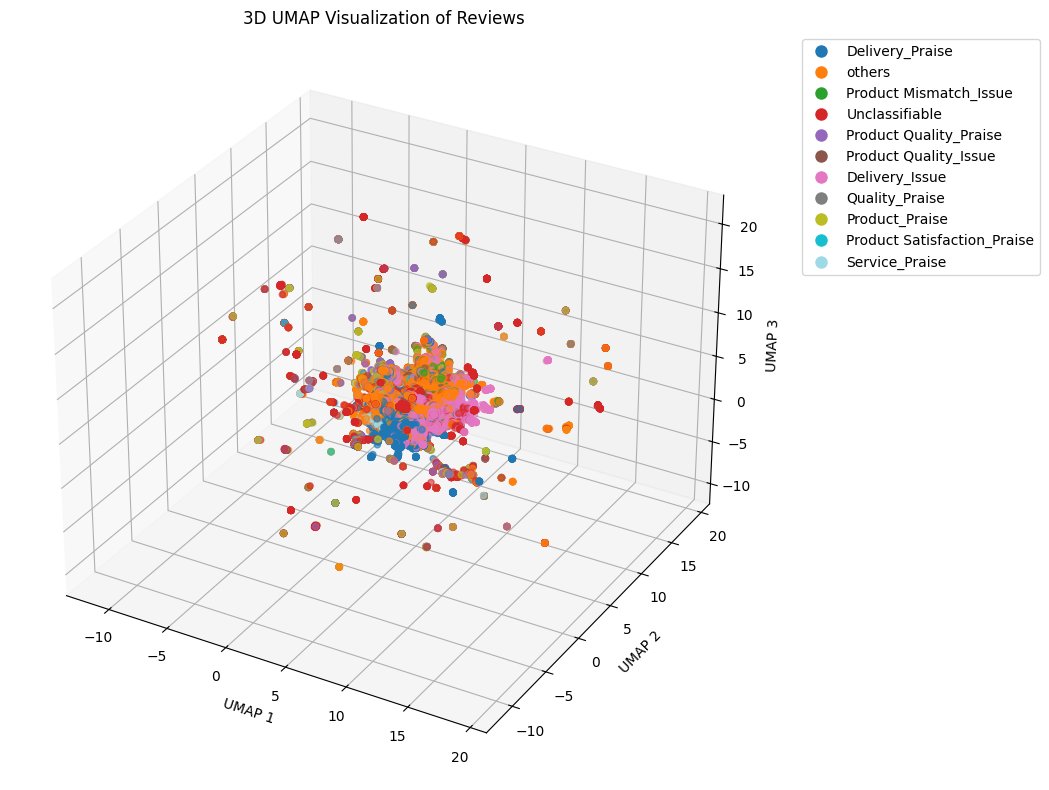

In [ ]:
import matplotlib.pyplot as plt
from umap import UMAP

# UMAPで3次元に圧縮
umap_3d = UMAP(n_components=3, random_state=42, min_dist=0.5)
embeddings_3d = umap_3d.fit_transform(embeddings)

# 3D散布図の作成
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# カテゴリごとの色分け
unique_categories = df_review_no_null["review_categories_str_modified_2"].unique()
color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))
category_to_color = dict(zip(unique_categories, color_map))

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# 3D散布図をプロット
scatter = ax.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=colors, alpha=0.6
)

# 凡例を追加
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=category_to_color[cat],
        label=cat,
        markersize=10,
    )
    for cat in unique_categories
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")

# グラフのタイトルと軸ラベル
ax.set_title("3D UMAP Visualization of Reviews")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")

plt.tight_layout()
plt.show()

/Users/shim-kojio/Desktop/ey_sat_lab/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shim-kojio/Desktop/ey_sat_lab/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/30/20s46n1s20jdzzh6w9vnkglw0000gn/T/ipykernel_18034/3797655241.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))


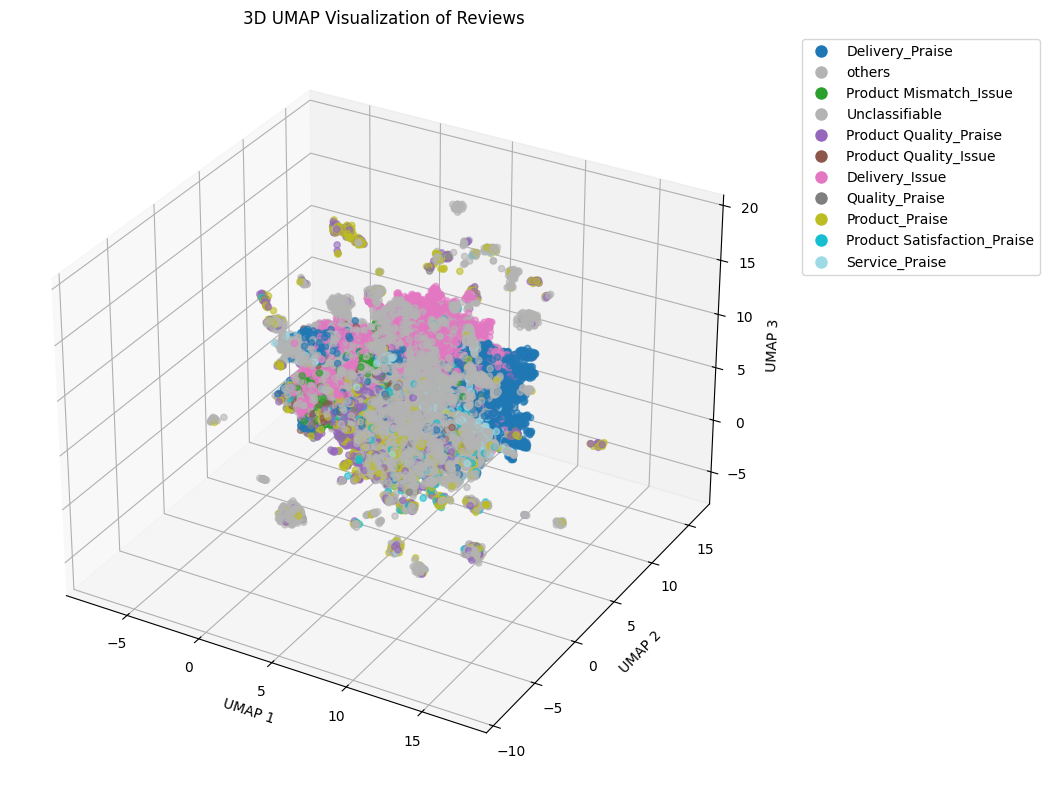

In [31]:
import matplotlib.pyplot as plt
from umap import UMAP

# UMAPで3次元に圧縮
umap_3d = UMAP(n_components=3, random_state=42, min_dist=1)
embeddings_3d = umap_3d.fit_transform(embeddings)

# 3D散布図の作成
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

unique_categories = df_review_no_null["review_categories_str_modified_2"].unique()
color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))
category_to_color = dict(zip(unique_categories, color_map))

# Unclassifiable と others をグレーに設定
category_to_color["Unclassifiable"] = (0.7, 0.7, 0.7, 1.0)  # グレー
category_to_color["others"] = (0.7, 0.7, 0.7, 1.0)  # グレー

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# 3D散布図をプロット
scatter = ax.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=colors, alpha=0.6
)

# 凡例を追加
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=category_to_color[cat],
        label=cat,
        markersize=10,
    )
    for cat in unique_categories
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")

# グラフのタイトルと軸ラベル
ax.set_title("3D UMAP Visualization of Reviews")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")

plt.tight_layout()
plt.show()

In [41]:
embeddings.shape

(40650, 384)

/Users/shim-kojio/Desktop/ey_sat_lab/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shim-kojio/Desktop/ey_sat_lab/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/30/20s46n1s20jdzzh6w9vnkglw0000gn/T/ipykernel_18034/918439956.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))


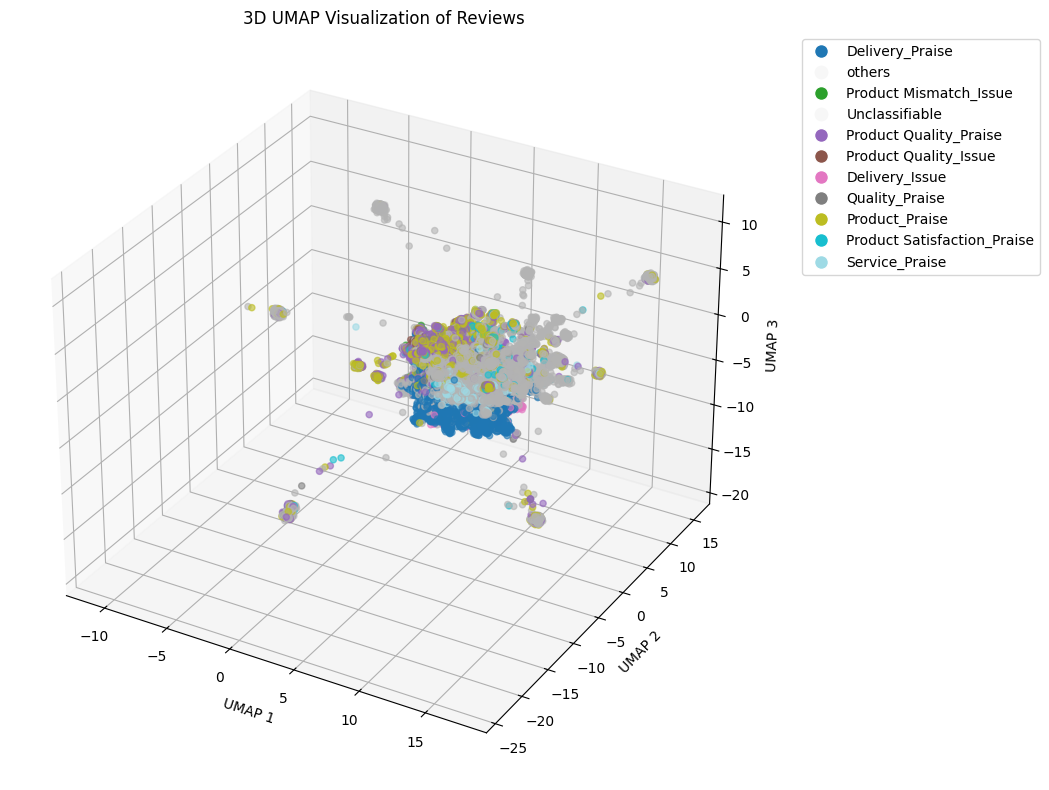

In [42]:
import matplotlib.pyplot as plt
from umap import UMAP

# UMAPで3次元に圧縮
umap_3d = UMAP(n_components=3, random_state=42, min_dist=0.90, n_neighbors=200)
embeddings_3d = umap_3d.fit_transform(embeddings)

# 3D散布図の作成
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

unique_categories = df_review_no_null["review_categories_str_modified_2"].unique()
color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))
category_to_color = dict(zip(unique_categories, color_map))

# Unclassifiable と others をグレーに設定
category_to_color["Unclassifiable"] = (0.7, 0.7, 0.7, 0.1)  # グレー
category_to_color["others"] = (0.7, 0.7, 0.7, 0.1)  # グレー

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# 3D散布図をプロット
scatter = ax.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=colors, alpha=0.6
)

# 凡例を追加
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=category_to_color[cat],
        label=cat,
        markersize=10,
    )
    for cat in unique_categories
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")

# グラフのタイトルと軸ラベル
ax.set_title("3D UMAP Visualization of Reviews")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")

plt.tight_layout()
plt.show()

/Users/shim-kojio/Desktop/ey_sat_lab/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shim-kojio/Desktop/ey_sat_lab/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/30/20s46n1s20jdzzh6w9vnkglw0000gn/T/ipykernel_18034/3445960045.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))


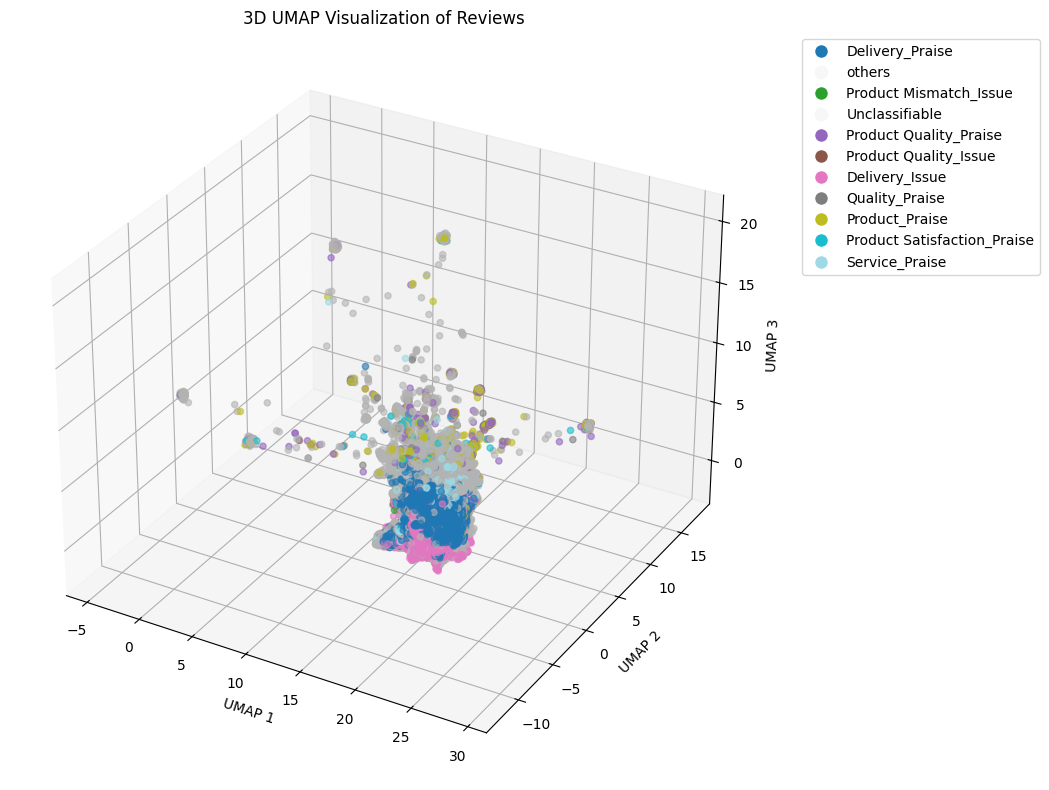

In [43]:
import matplotlib.pyplot as plt
from umap import UMAP

# UMAPで3次元に圧縮
umap_3d = UMAP(n_components=3, random_state=42, min_dist=0.60, n_neighbors=800)
embeddings_3d = umap_3d.fit_transform(embeddings)

# 3D散布図の作成
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

unique_categories = df_review_no_null["review_categories_str_modified_2"].unique()
color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))
category_to_color = dict(zip(unique_categories, color_map))

# Unclassifiable と others をグレーに設定
category_to_color["Unclassifiable"] = (0.7, 0.7, 0.7, 0.1)  # グレー
category_to_color["others"] = (0.7, 0.7, 0.7, 0.1)  # グレー

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# 3D散布図をプロット
scatter = ax.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=colors, alpha=0.6
)

# 凡例を追加
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=category_to_color[cat],
        label=cat,
        markersize=10,
    )
    for cat in unique_categories
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")

# グラフのタイトルと軸ラベル
ax.set_title("3D UMAP Visualization of Reviews")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from umap import UMAP

# UMAPで3次元に圧縮
umap_3d = UMAP(n_components=3, random_state=42, min_dist=0.60, n_neighbors=600)
embeddings_3d = umap_3d.fit_transform(embeddings)

# 3D散布図の作成
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

unique_categories = df_review_no_null["review_categories_str_modified_2"].unique()
color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))
category_to_color = dict(zip(unique_categories, color_map))

# Unclassifiable と others をグレーに設定
category_to_color["Unclassifiable"] = (0.7, 0.7, 0.7, 0.1)  # グレー
category_to_color["others"] = (0.7, 0.7, 0.7, 0.1)  # グレー

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# 3D散布図をプロット
scatter = ax.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=colors, alpha=0.6
)

# 凡例を追加
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=category_to_color[cat],
        label=cat,
        markersize=10,
    )
    for cat in unique_categories
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")

# グラフのタイトルと軸ラベル
ax.set_title("3D UMAP Visualization of Reviews")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

/var/folders/30/20s46n1s20jdzzh6w9vnkglw0000gn/T/ipykernel_18034/2743696602.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))


In [50]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

unique_categories = df_review_no_null["review_categories_str_modified_2"].unique()
color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))
category_to_color = dict(zip(unique_categories, color_map))

# Unclassifiable と others をグレーに設定
category_to_color["Unclassifiable"] = (0.7, 0.7, 0.7, 0.1)  # グレー
category_to_color["others"] = (0.7, 0.7, 0.7, 0.1)  # グレー

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# カテゴリに基づいて色を割り当て
colors = [
    category_to_color[cat]
    for cat in df_review_no_null["review_categories_str_modified_2"].to_list()
]

# 3D散布図をプロット
scatter = ax.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=colors, alpha=0.6
)

# 凡例を追加
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=category_to_color[cat],
        label=cat,
        markersize=10,
    )
    for cat in unique_categories
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")

# グラフのタイトルと軸ラベル
ax.set_title("3D UMAP Visualization of Reviews")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

/var/folders/30/20s46n1s20jdzzh6w9vnkglw0000gn/T/ipykernel_18034/1745199443.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(unique_categories)))
